## Note: Used internet and GPU to first run the experiments. Then used a different kernel to submit submission file

In [1]:
# Convert CSV data to images
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm_notebook as tqdm

os.mkdir("images");
os.mkdir("images/train");
os.mkdir("images/test");

In [2]:
#Training data
dv = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv");
for i in tqdm(range(60000)):
    x = dv.iloc[i].to_numpy();
    label = str(x[0])
    img = x[1:]
    img = np.reshape(img, (28, 28));
    img = np.expand_dims(img, axis=0);
    img = np.vstack((img, img, img))
    img = np.swapaxes(img, 0, 1);
    img = np.swapaxes(img, 1, 2);
    if(not os.path.isdir("images/train/" + label)):
        os.mkdir("images/train/" + label);
    
    cv2.imwrite("images/train/" + label + "/" + str(i) + ".jpg", img);
    
    
#Testing data
dv = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv");
for i in tqdm(range(5000)):
    x = dv.iloc[i].to_numpy();
    id_ = str(x[0])
    img = x[1:]
    img = np.reshape(img, (28, 28));
    img = np.expand_dims(img, axis=0);
    img = np.vstack((img, img, img))
    img = np.swapaxes(img, 0, 1);
    img = np.swapaxes(img, 1, 2);
    cv2.imwrite("images/test/" + str(id_) + ".jpg", img);

# Introducing Monk
- An **open-source low code** transfer learning toolkit that acts as a unified wrapper over deep learning frameworks

- Get More details: https://medium.com/@Abhishek4273/expediting-transfer-learning-the-monks-way-422d7ec40ec6

## Features
- a. A **syntax invariant wrapper** over pytorch, keras, mxnet-gluon for computer vision
- b. Write **less code** to quickly prototype and experiment
- c. **Compare metrics** across experiments.

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (576/576), done.
remote: Compressing objects: 100% (384/384), done.
remote: Total 576 (delta 188), reused 549 (delta 172), pack-reused 0
Receiving objects: 100% (576/576), 4.70 MiB | 0 bytes/s, done.
Resolving deltas: 100% (188/188), done.


### Custom dependency installation script for kaggle

In [4]:
!pip install -r /kaggle/working/monk_v1/installation/requirements_kaggle.txt

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12620 sha256=c486c284aa4fe537606962645282376d857f5b24c4781158eff77d33a47b8320
  Stored in directory: /tmp/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff20687e3bad6867d63155dbde5a7c10f4293
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=8baf7e77c9c4f66855b7cd7430f44b44720e5c91dfce18df3ed17a4770a7d3a6
  Stored in directory: /tmp/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gpustat GPUtil


In [5]:
import sys
sys.path.append("/kaggle/working/monk_v1/monk/")

## Example 1 - Using pyrotch resnet50 to train the classifier in Quick Mode

In [6]:
# Step 0 - Using Pytorch
from pytorch_prototype import prototype

In [7]:
# Step 1 - Create experiment
ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-1");

Pytorch Version: 1.3.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /kaggle/working/workspace/sample-project-1/sample-experiment-1/



## Invoke [Quick Mode](https://clever-noyce-f9d43f.netlify.com/#/quick_mode/quickmode_pytorch) 

In [8]:
# Step 2
ptf.Default(dataset_path="images/train/",
           model_name="resnet50", freeze_base_network=True,
           num_epochs=25);

Dataset Details
    Train path:     images/train/
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 42000
    Num val images:   18000
    Num classes:      10

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


    Model Loaded on device
        Model name:           resnet50
        Num layers in model:  80
        Num trainable layers: 1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'dampening': 0, 'nesterov': False, 'weight_decay': 0, 'momentum': 0}

Learning rate scheduler
    Name:   reduceonplateaulr
    Params: {'mode': 'min', 'factor': 0.1, 'patience': 8, 'verbose': True, 'threshold': 0.0001, 'threshold_mode': 'rel', 'cooldown': 0, 'min_lr': 0, 'epsilon': 1e-08}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'size_average': None, 'ignore_index': -100, 'reduce': None, 'reduction': 'mean'}

Training params
    Num Epochs: 25

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



### Using Monk's [Update MODE](https://clever-noyce-f9d43f.netlify.com/#/update_mode/update_dataset)

In [9]:
# Additional Step
ptf.update_save_intermediate_models(False); 
ptf.update_display_progress_realtime(False);
ptf.update_batch_size(32);
ptf.Reload();

Update: Save Intermediate models - False

Update: Display progress realtime - False

Update: Batch size - 32

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 42000
    Num val images:   18000
    Num classes:      10

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           resnet50
        Num layers in model:  80
        Num trainable layers: 1



In [10]:
# Step - 3
ptf.Train();

Training Start
    Epoch 1/25
    ----------
    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.810, Train-loss: 0.797 | Val-acc: 0.898944, Val-loss: 0.426, | time: 141.4 sec

    Epoch 2/25
    ----------
    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.897, Train-loss: 0.406 | Val-acc: 0.915167, Val-loss: 0.329, | time: 137.1 sec

    Epoch 3/25
    ----------
    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.909, Train-loss: 0.338 | Val-acc: 0.926222, Val-loss: 0.284, | time: 138.9 sec

    Epoch 4/25
    ----------
    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.917, Train-loss: 0.304 | Val-acc: 0.931778, Val-loss: 0.255, | time: 137.3 sec

    Epoch 5/25
    ----------
    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.923, Train-loss: 0.274 | Val-acc: 0.935722, Val-loss: 0.234, | time: 137.8 sec

    Epoch 6/25
    ----------
    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.926, Train-loss: 0.261 | Val-acc: 0.938222, Val-loss: 0.228, | time: 138.7 sec

    Epoch 7/25
    ----------
    curr_lr - 0.01


<Figure size 432x288 with 0 Axes>

## Example 2 - Using gluon resnet50 to train the classifier in Quick Mode

In [11]:
# Step 0 - Using Gluon
from gluon_prototype import prototype

In [12]:
# Step 1 - Create experiment
ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-2");

Mxnet Version: 1.5.1

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-2
    Dir: /kaggle/working/workspace/sample-project-1/sample-experiment-2/



In [13]:
# Step 2 - Invoke Quick Prototype Default mode
ptf.Default(dataset_path="images/train/",
           model_name="resnet50_v2", freeze_base_network=True,
           num_epochs=25);

Dataset Details
    Train path:     images/train/
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 42000
    Num val images:   18000
    Num classes:      10

Model Params
    Model name:           resnet50_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
Model file is not found. Downloading.


92863KB [00:02, 43274.31KB/s]                           


    Model Loaded on device
        Model name:           resnet50_v2
        Num layers in model:  129
        Num trainable layers: 1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'dampening': 0, 'nesterov': False, 'weight_decay': 0, 'momentum': 0}

Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 8, 'gamma': 0.1, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'size_average': None, 'ignore_index': -100, 'reduction': 'mean'}

Training params
    Num Epochs: 25

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



### Using Monk's [Update MODE](https://clever-noyce-f9d43f.netlify.com/#/update_mode/update_dataset)

In [14]:
# Additional Step
ptf.update_save_intermediate_models(False); 
ptf.update_display_progress_realtime(False);
ptf.update_batch_size(32);
ptf.Reload();

Update: Save Intermediate models - False

Update: Display progress realtime - False

Update: Batch size - 32

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 42000
    Num val images:   18000
    Num classes:      10

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           resnet50_v2
        Num layers in model:  129
        Num trainable layers: 2



In [15]:
# Step 3 - Train
ptf.Train();

Training Start
    Epoch 1/25
    ----------
    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.728, Train-loss: 1.001 | Val-acc: 0.818167, Val-loss: 0.662, | time: 132.0 sec

    Epoch 2/25
    ----------
    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.832, Train-loss: 0.582 | Val-acc: 0.846333, Val-loss: 0.528, | time: 134.2 sec

    Epoch 3/25
    ----------
    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.852, Train-loss: 0.497 | Val-acc: 0.858444, Val-loss: 0.469, | time: 132.8 sec

    Epoch 4/25
    ----------
    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.865, Train-loss: 0.448 | Val-acc: 0.865056, Val-loss: 0.442, | time: 132.8 sec

    Epoch 5/25
    ----------
    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.868, Train-loss: 0.427 | Val-acc: 0.868056, Val-loss: 0.414, | time: 132.3 sec

    Epoch 6/25
    ----------
    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.873, Train-loss: 0.405 | Val-acc: 0.868111, Val-loss: 0.411, | time: 131.9 sec

    Epoch 7/25
    ----------
    curr_lr - 0.01


<Figure size 432x288 with 0 Axes>

## Example 3 - Using keras resnet50 to train the classifier in Quick Mode

In [16]:
# Step 0 - Using Keras
from keras_prototype import prototype

In [17]:
# Step 1 - Create experiment
ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-3");

Keras Version: 2.3.1
Tensorflow Version: 2.0.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-3
    Dir: /kaggle/working/workspace/sample-project-1/sample-experiment-3/



In [18]:
# Step 2 - Invoke Quick Prototype Default mode
ptf.Default(dataset_path="images/train/",
           model_name="resnet50_v2", freeze_base_network=True,
           num_epochs=25);

Dataset Details
    Train path:     images/train/
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Found 42000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 42000
    Num val images:   18000
    Num classes:      10

Model Params
    Model name:           resnet50_v2
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
94674944/94668760 [==============================] - 2s 0us/step
    Model Loaded on device
       

### Using Monk's [Update MODE](https://clever-noyce-f9d43f.netlify.com/#/update_mode/update_dataset)

In [19]:
# Additional Step
ptf.update_save_intermediate_models(False); 
ptf.update_display_progress_realtime(False);
ptf.update_batch_size(32);
ptf.Reload();

Update: Save Intermediate models - False

Update: Display progress realtime - False

Update: Batch size - 32

Found 42000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 42000
    Num val images:   18000
    Num classes:      10

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           resnet50_v2
        Num layers in model:  196
        Num trainable layers: 6



In [20]:
ptf.Train();

Training Start
Epoch 1/25
 - 175s - loss: 1.8674 - accuracy: 0.3547 - val_loss: 535.2614 - val_accuracy: 0.0993

Epoch 00001: saving model to workspace/sample-project-1/sample-experiment-3/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 535.26135, saving model to workspace/sample-project-1/sample-experiment-3/output/models/best_model.h5
Epoch 2/25
 - 168s - loss: 1.2270 - accuracy: 0.6084 - val_loss: 388.7067 - val_accuracy: 0.0747

Epoch 00002: saving model to workspace/sample-project-1/sample-experiment-3/output/models/resume_state.h5

Epoch 00002: val_loss improved from 535.26135 to 388.70667, saving model to workspace/sample-project-1/sample-experiment-3/output/models/best_model.h5
Epoch 3/25
 - 168s - loss: 0.9663 - accuracy: 0.6890 - val_loss: 350.3951 - val_accuracy: 0.0864

Epoch 00003: saving model to workspace/sample-project-1/sample-experiment-3/output/models/resume_state.h5

Epoch 00003: val_loss improved from 388.70667 to 350.39505, saving model t

<Figure size 432x288 with 0 Axes>

## Compare the experiments irrespective of backend library
- Training accuracy curves
- Training loss curves
- Validation accuravy curves
- Validation loss curves
- GPU memory usages
- Training times

In [21]:
from compare_prototype import compare

ctf = compare(verbose=1);
ctf.Comparison("Sample-Comparison-1");
ctf.Add_Experiment("sample-project-1", "sample-experiment-1");
ctf.Add_Experiment("sample-project-1", "sample-experiment-2");
ctf.Add_Experiment("sample-project-1", "sample-experiment-3");

ctf.Generate_Statistics();

Comparison: - Sample-Comparison-1
Project - sample-project-1, Experiment - sample-experiment-1 added
Project - sample-project-1, Experiment - sample-experiment-2 added
Project - sample-project-1, Experiment - sample-experiment-3 added
Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Display comparisons

In [22]:
from IPython.display import Image
from IPython.display import display

In [23]:
os.listdir("/kaggle/working/workspace/comparison/Sample-Comparison-1/")

['train_accuracy.png',
 'val_loss.png',
 'train_loss.png',
 'stats_best_val_acc.png',
 'stats_training_time.png',
 'val_accuracy.png',
 'stats_max_gpu_usage.png',
 'comparison.csv']

### Compare training accuracy and loss curves

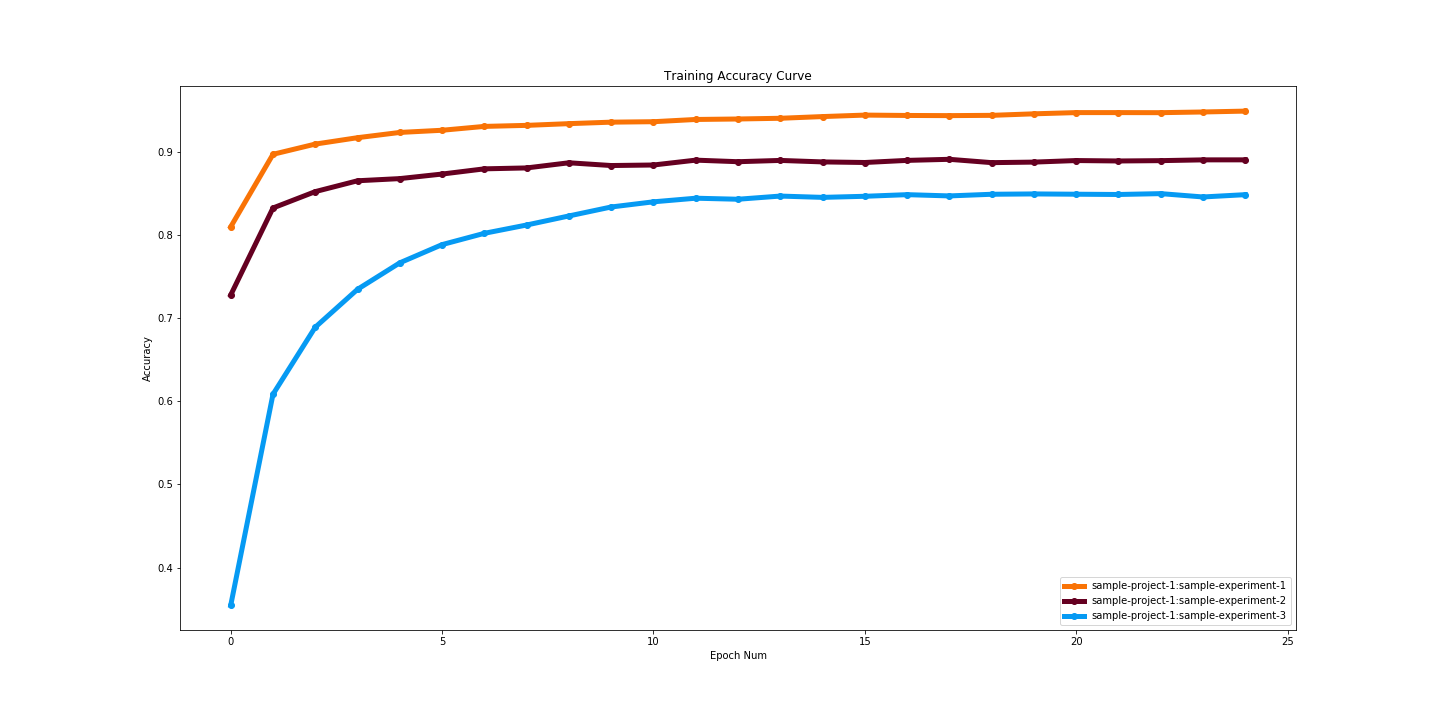

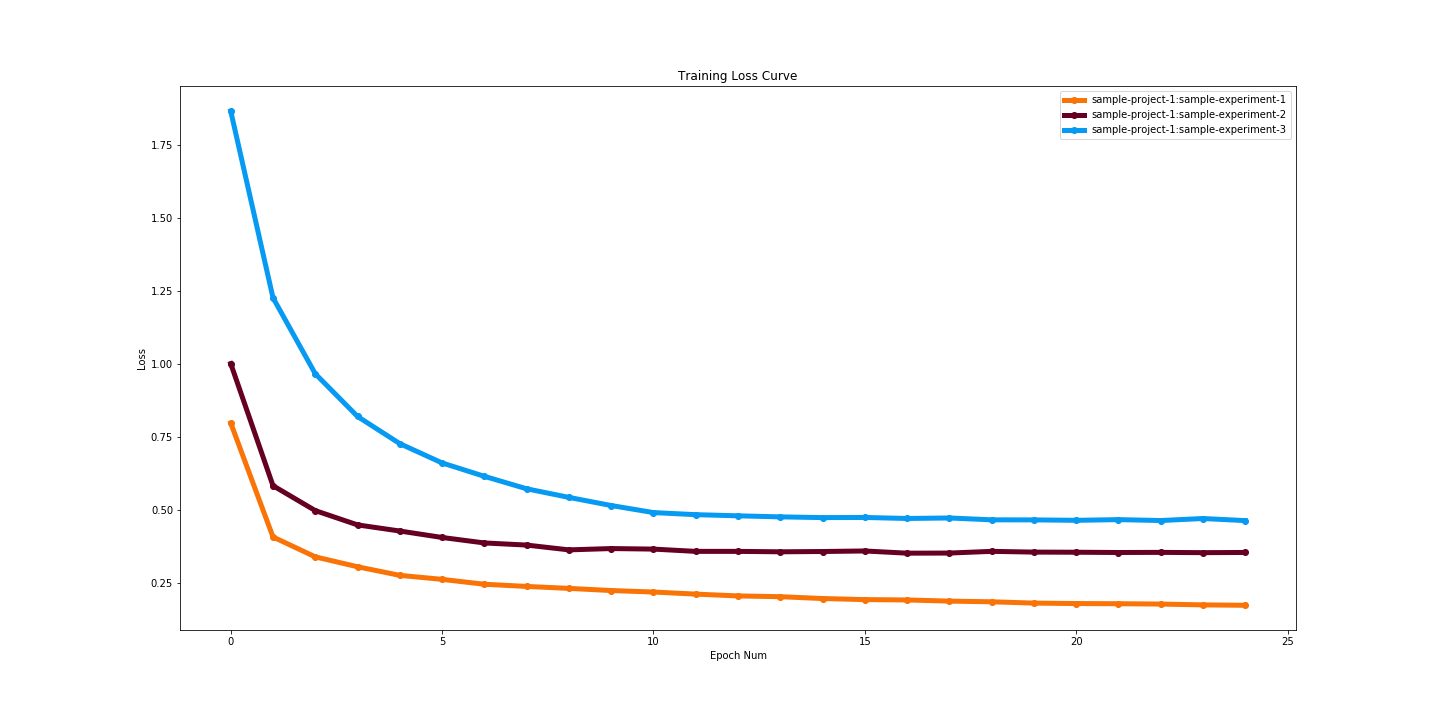

In [24]:
x = Image(filename='/kaggle/working/workspace/comparison/Sample-Comparison-1/train_accuracy.png') 
y = Image(filename='/kaggle/working/workspace/comparison/Sample-Comparison-1/train_loss.png') 
display(x, y)

### Compare validation accuracy and loss curves

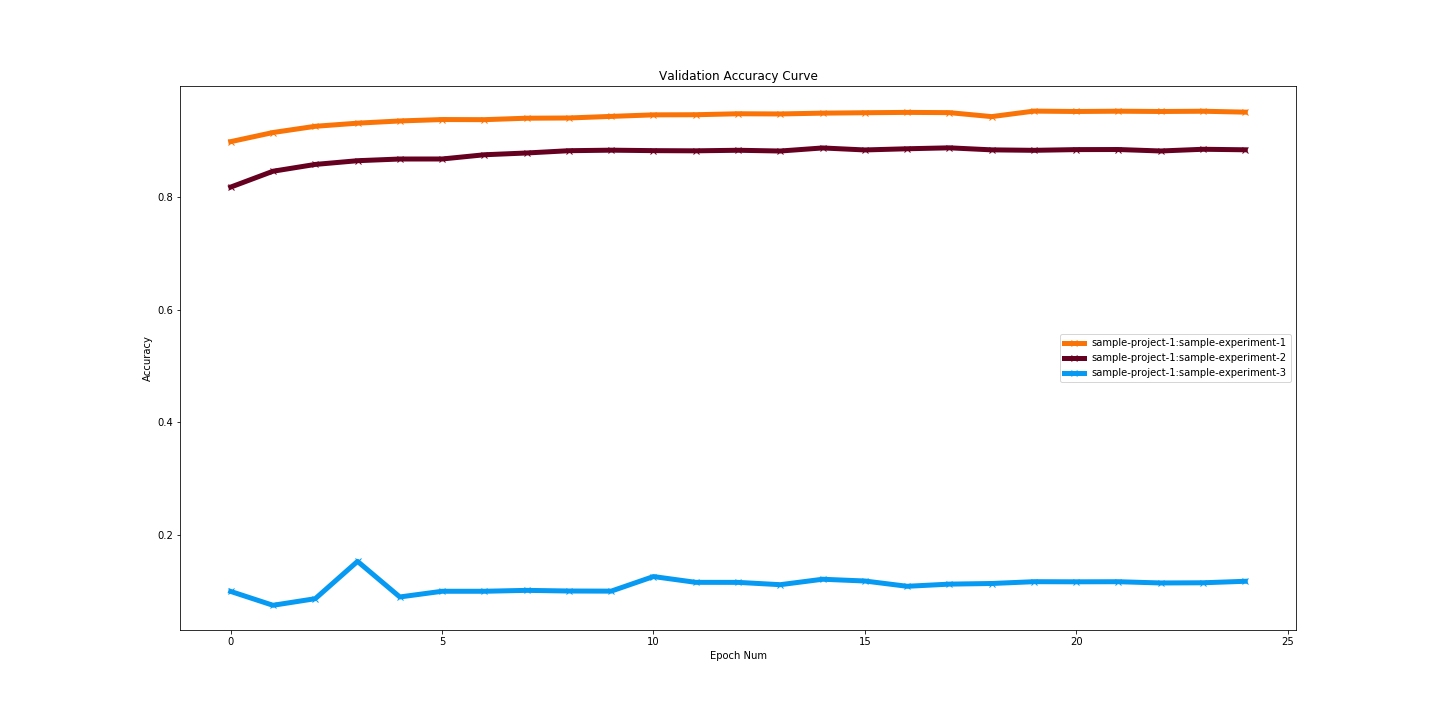

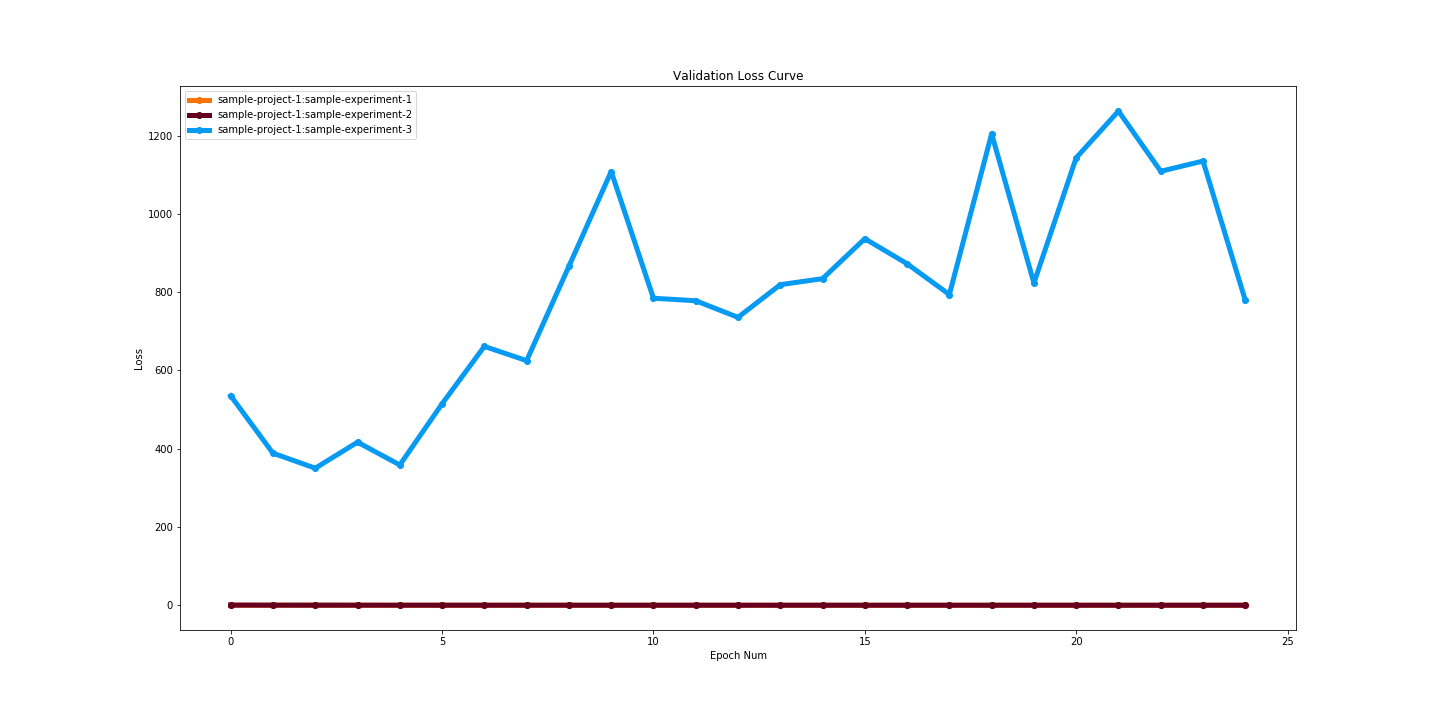

In [25]:
x = Image(filename='/kaggle/working/workspace/comparison/Sample-Comparison-1/val_accuracy.png') 
y = Image(filename='/kaggle/working/workspace/comparison/Sample-Comparison-1/val_loss.png') 
display(x, y)

### Compare gpu memory usages and training times

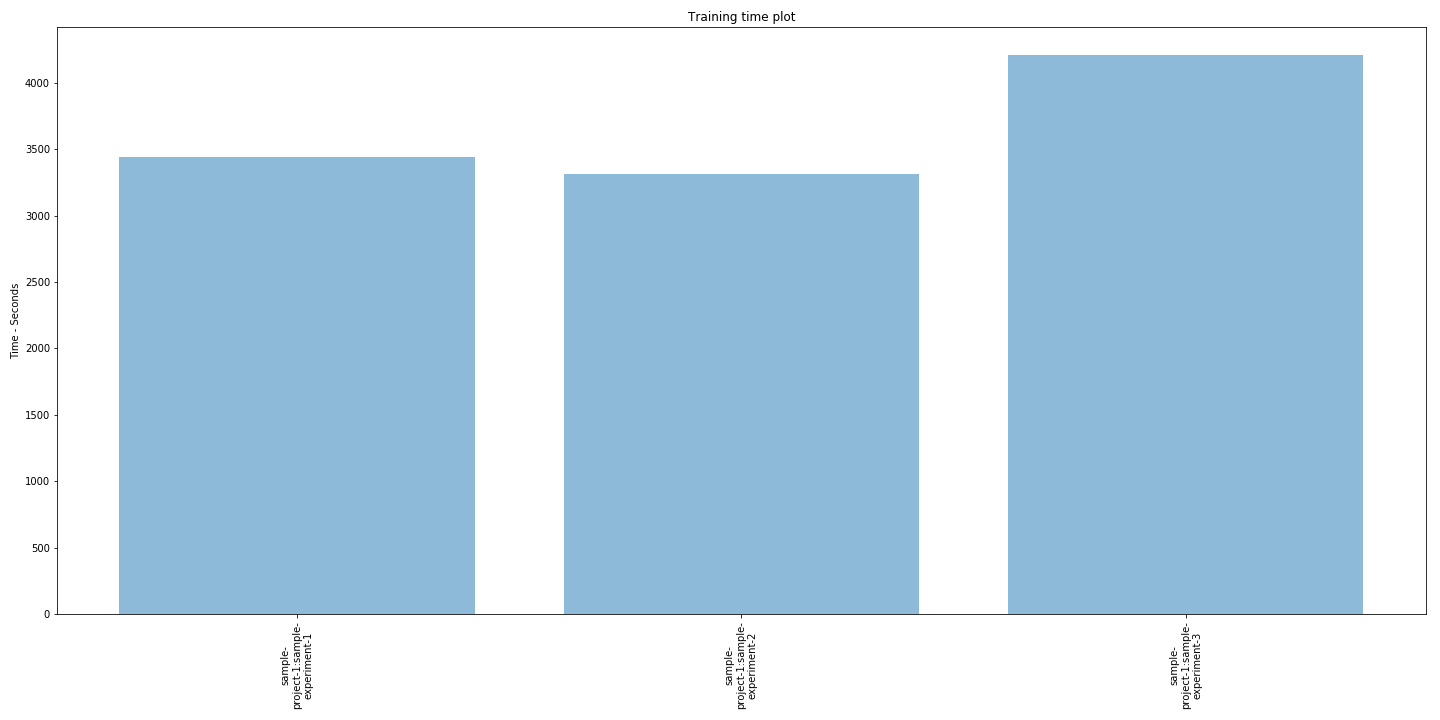

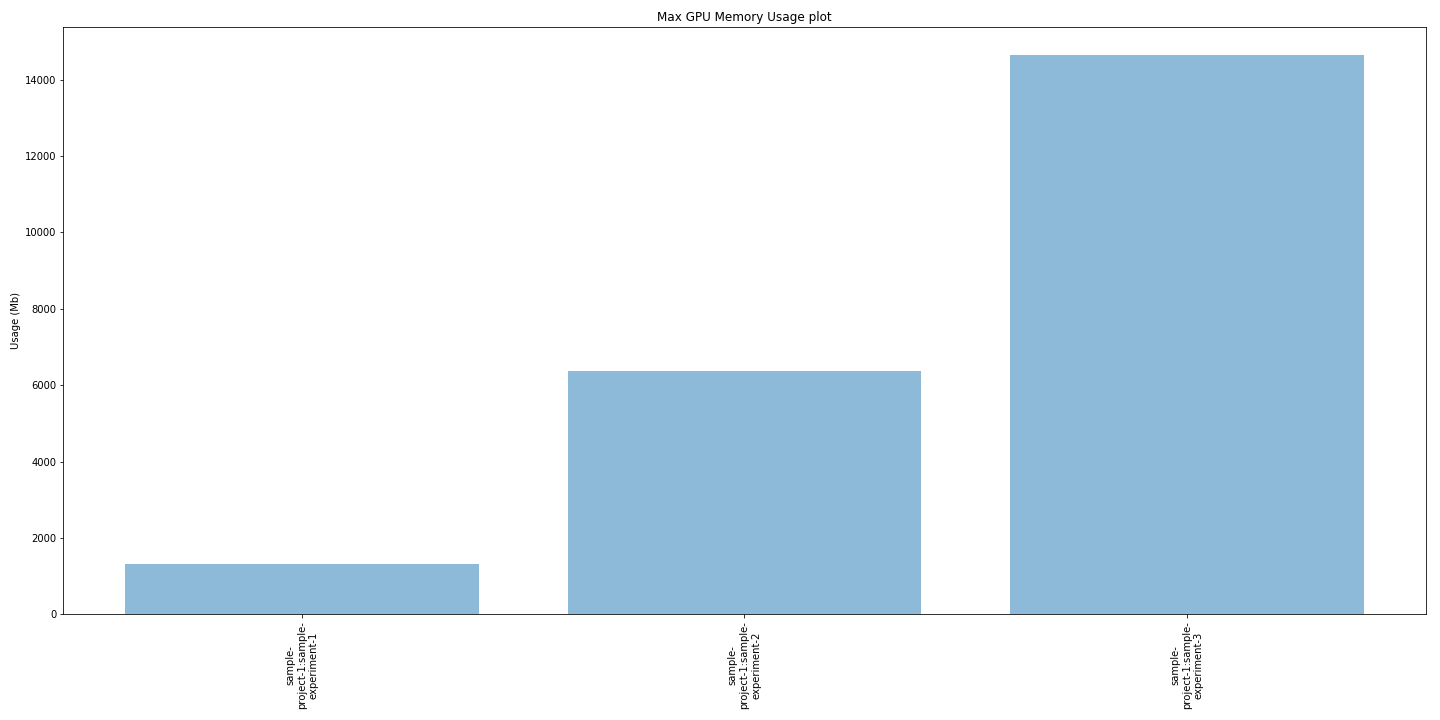

In [26]:
x = Image(filename='/kaggle/working/workspace/comparison/Sample-Comparison-1/stats_training_time.png') 
y = Image(filename='/kaggle/working/workspace/comparison/Sample-Comparison-1/stats_max_gpu_usage.png') 
display(x, y)

### Select the most suitable experiment for inferencing (As per the results you achieve)

In [27]:
from pytorch_prototype import prototype


## Load the experiment with eval_infer tag

In [28]:
ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Pytorch Version: 1.3.0

Model Details
    Loading model - /kaggle/working/workspace/sample-project-1/sample-experiment-1/output/models/final
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /kaggle/working/workspace/sample-project-1/sample-experiment-1/



## Infer using a single command

In [29]:
inference_dataset = "images/test/";
output = ptf.Infer(img_dir=inference_dataset);

Prediction
    Dir path:           images/test/
    Total Images:       5000
Processing Images


In [30]:
# Create submission
import pandas as pd
sub = pd.read_csv("/kaggle/input/Kannada-MNIST/sample_submission.csv");
for i in range(len(output)):
    index = int(sub[sub['id']==int(output[i]['img_name'].split(".")[0])].index[0])
    #print(output[i]);
    #print(index);
    sub['label'][index] = int(output[i]['predicted_class'])
    #print(sub.iloc[index:index+1])
    #break
sub.to_csv("submission.csv", index=False);

In [31]:
sub.iloc[0:5]

,id,label
0,0,3
1,1,0
2,2,2
3,3,1
4,4,7


In [32]:
!rm -r /kaggle/working/monk_v1/

In [33]:
!rm -r images